In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [ ]:
filepath = "./data/catB_train.parquet"
df = pd.read_csv('/data/catB.csv')
df["f_purchase_lh"] = df["f_purchase_lh"].fillna(0)
y = df["f_purchase_lh"]
x = pd.DataFrame()

In [ ]:
df["ctrycode_desc"] = (df["ctrycode_desc"] != "Singapore").astype(int)

mapping1 = {"P": 0, "G": 1, "C": 2}
df["clttype"] = df["clttype"].replace(mapping1)

mapping2 = {"ACTIVE": 0, "LAPSED": 1, "MATURED": 2}
df["stat_flag"] = df["stat_flag"].replace(mapping2)

In [ ]:
df['min_occ_date'] = pd.to_datetime(df['min_occ_date'], errors='coerce')
median_value = df['min_occ_date'].median()
df['min_occ_date'].fillna(median_value, inplace=True)
current_date = datetime.now()
df['min_occ_date'] = (current_date - df['min_occ_date']).astype('timedelta64[Y]').astype(int)

In [ ]:
df['cltdob_fix'] = pd.to_datetime(df['cltdob_fix'], errors='coerce')
median_value = df['cltdob_fix'].median()
df['cltdob_fix'].fillna(median_value, inplace=True)
current_date = datetime.now()
df['cltdob_fix'] = (current_date - df['cltdob_fix']).astype('timedelta64[Y]').astype(int)

In [ ]:
df["cltsex_fix"] = (df["cltsex_fix"] != "Male").astype(int)
for i in range(3, 9):
  x[df.columns[i]] = df[df.columns[i]]

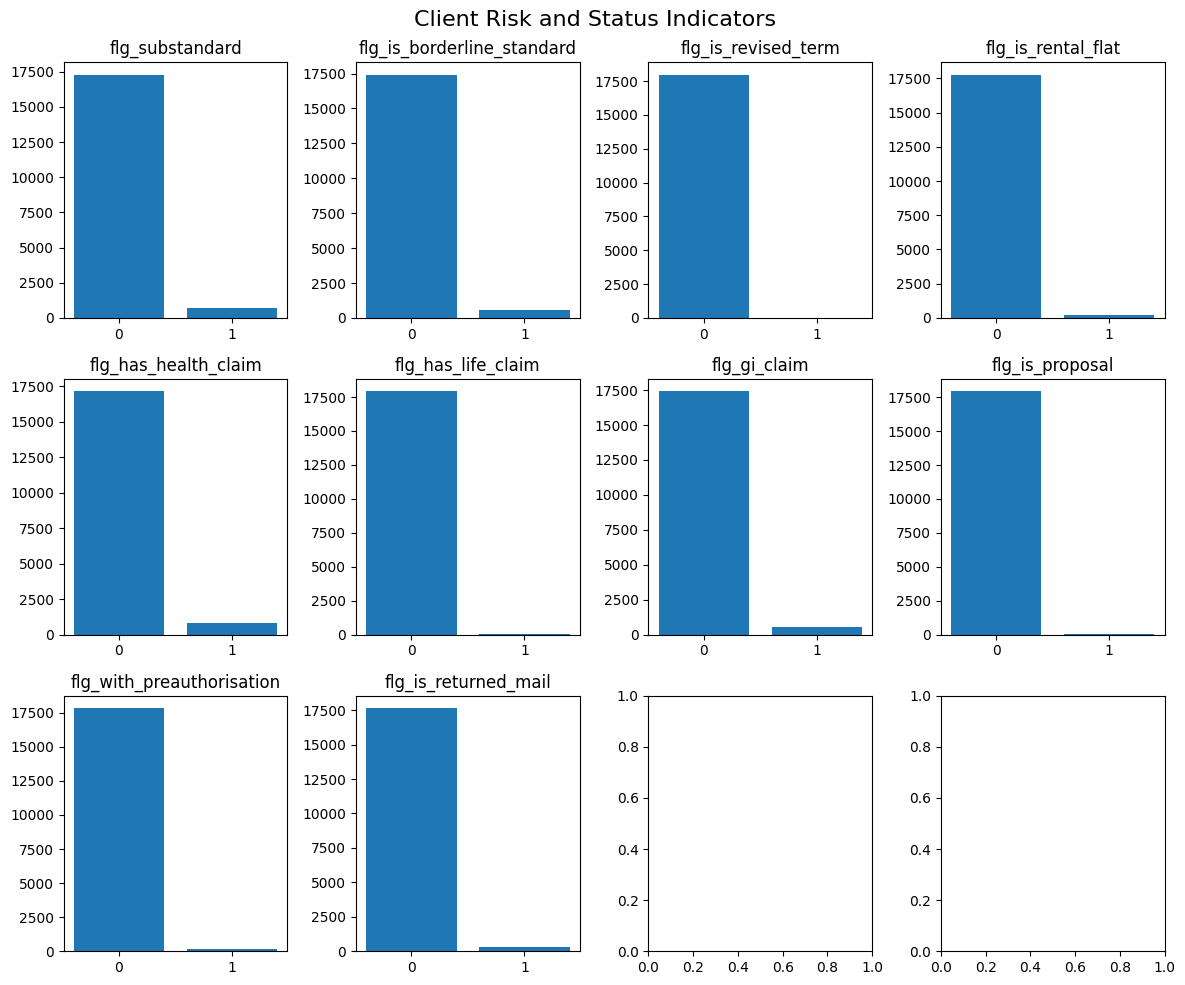

In [ ]:
columns_to_plot = df.columns[9:19]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    df[column] = df[column].fillna(0)
    data = df[column].value_counts()
    axes[i].bar(data.index, data.values)
    axes[i].set_xticks([0, 1])
    axes[i].set_title(column)
fig.suptitle('Client Risk and Status Indicators', fontsize=16)
plt.tight_layout()
plt.show()
for i in range(9, 19):
  x[df.columns[i]] = df[df.columns[i]]

In the context of constructing a predictive model for our insurance-related problem statement, it is crucial to retain certain binary variables, even when the occurrence of a specific value ('1') is less than 1% of the dataset. Notably, variables such as flg_has_life_claim and others related to risk and client status indicators play a pivotal role in capturing rare but impactful occurrences.

For instance, flags like flg_has_life_claim, indicating whether a client has filed life insurance claims, may have '1' values that represent less than 1% of the dataset. Despite their apparent infrequency, these flags are immensely valuable in understanding critical aspects of a client's insurance history. The rarity of these events underscores their significance – a life insurance claim, for example, is a momentous occurrence that can profoundly influence a client's risk profile.

Similarly, flags like flg_is_proposal and flg_with_preauthorisation shed light on the active engagement of clients in the insurance process, providing insights into their potential policy interests and preauthorised transactions. Retaining these variables ensures that the model can discern nuanced patterns related to client behaviour, which might be indicative of their likelihood to purchase or engage in insurance activities.

While some of these binary flags may seem sparse, their retention is justified by the need to capture the richness of client risk and status indicators. Such variables offer a nuanced perspective on client behavior, allowing the model to grasp not only common patterns but also rare but crucial occurrences that significantly impact the prediction of future insurance activities.

In conclusion, the decision to keep these binary variables, despite their infrequent '1' values, is rooted in their potential to contribute essential insights into client risk profiles and behaviours. By doing so, the model gains a more comprehensive understanding of the intricacies within the data, leading to a more informed and robust prediction of client actions in the insurance domain.

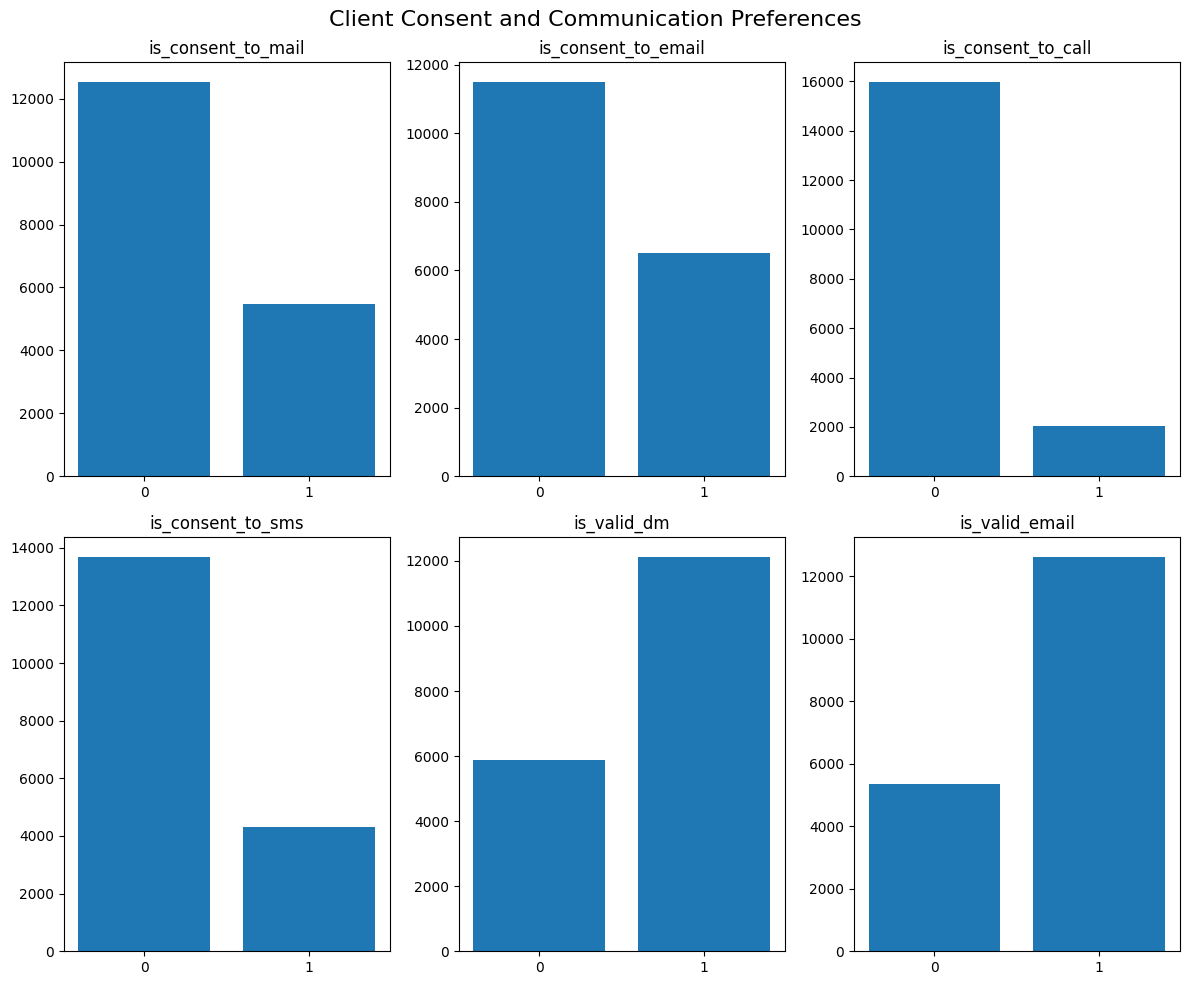

In [ ]:
columns_to_plot = df.columns[19:25]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    df[column] = df[column].fillna(0)
    data = df[column].value_counts()
    axes[i].bar(data.index, data.values)
    axes[i].set_xticks([0, 1])
    axes[i].set_title(column)
fig.suptitle('Client Consent and Communication Preferences', fontsize=16)
plt.tight_layout()
plt.show()
for i in range(19, 25):
  x[df.columns[i]] = df[df.columns[i]]

In the case of Client Consent & Communication Preferences, we believe that it would help with the model's predictive power as there may be certain communication types that impact whether the customer would choose to buy an insurance policy or not. As such, we believe that all 6 columns as stated above as provided by the dataset would be included to train and aid in predicting whether a potential customer would indeed adopt a policy from Singlife.

0        1
1        3
2        3
3        4
4        5
        ..
17987    3
17988    0
17989    3
17990    5
17991    3
Name: hh_size_est, Length: 17992, dtype: object


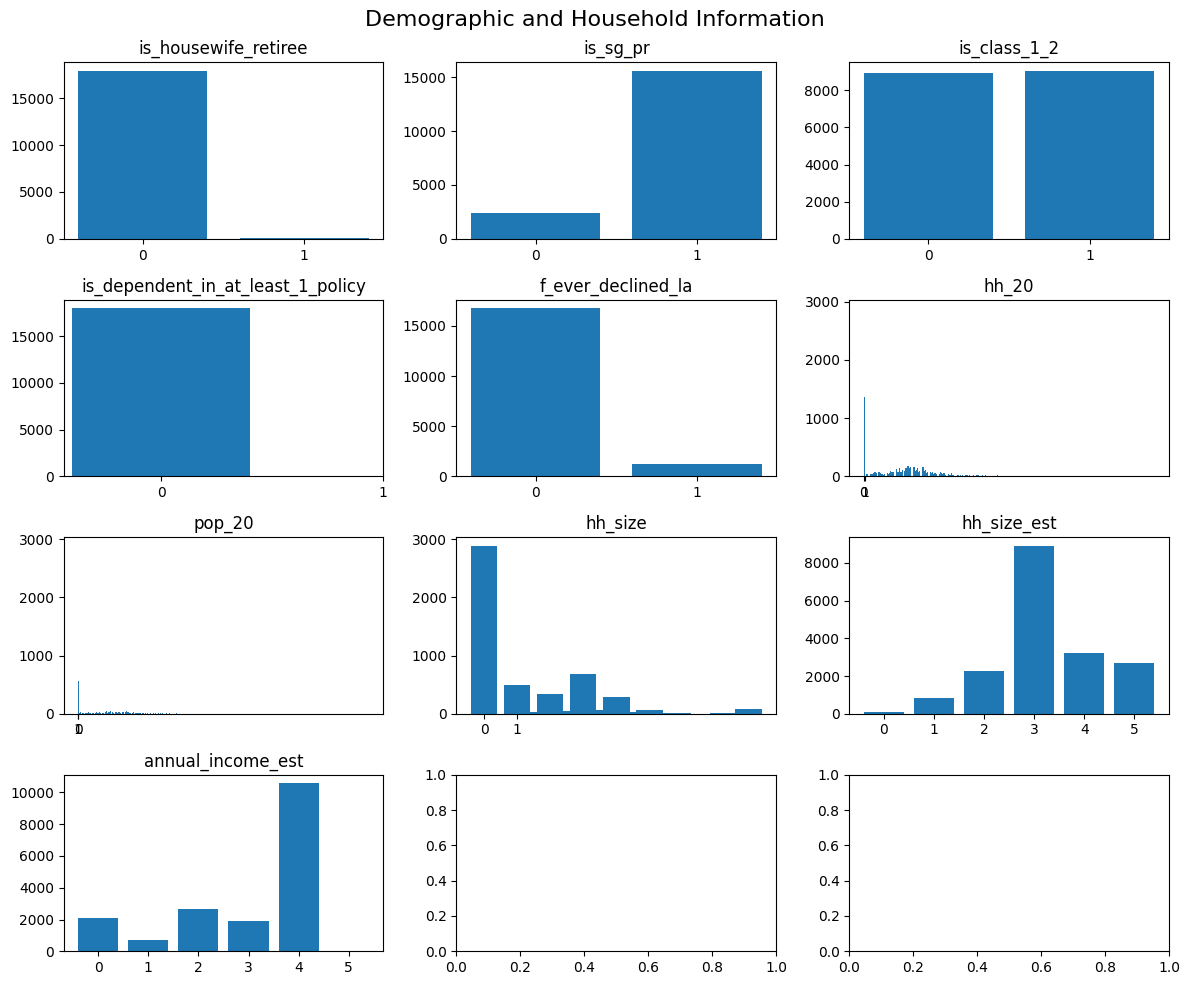

In [ ]:
columns_to_plot = df.columns[25:33]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    df[column] = df[column].fillna(0)
    data = df[column].value_counts()
    axes[i].bar(data.index, data.values)
    axes[i].set_xticks([0, 1])
    axes[i].set_title(column)

x_axis_labels = [0, 1, 2, 3, 4, 5]

#used mode of values change missing values
mode_result = df['hh_size_est'].mode()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df["hh_size_est"] = df["hh_size_est"].fillna(mode_result[0])

#Process >4 to 5 for Encoder, ensure all to String for Encoder
df['hh_size_est'] = df['hh_size_est'].replace('>4', '5')
df['hh_size_est'] = df['hh_size_est'].astype(str)

df["hh_size_est"] = label_encoder.fit_transform(df['hh_size_est'])
data = df["hh_size_est"].value_counts().reindex(x_axis_labels, fill_value= 0)
axes[8].bar(data.index, data.values)
axes[8].set_title("hh_size_est")

x_axis_labels = [0, 1, 2, 3, 4, 5]

#used mode of values change missing values
mode_result = df['annual_income_est'].mode()

df["annual_income_est"] = df["annual_income_est"].fillna(mode_result[0])
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Category' column
df["annual_income_est"] = label_encoder.fit_transform(df['annual_income_est'])
data = df["annual_income_est"].value_counts().reindex(x_axis_labels, fill_value=0)
axes[9].bar(data.index, data.values)
axes[9].set_title("annual_income_est")



fig.suptitle('Demographic and Household Information', fontsize=16)
plt.tight_layout()
plt.show()
for i in range(25, 30):
  x[df.columns[i]] = df[df.columns[i]]

for i in range(33, 35):
  x[df.columns[i]] = df[df.columns[i]]

Similar to the Client Consent and Client Preferences, certain demographics shown above will be included as a feature to aid in the predictive power of our model. This includes whether the customer is a housewife retiree, Singaporean PR, along with whether they are class 1 or class 2.

For hh_20, pop_20 and hh_size it will not be included as we believe that using hh_size_est would be adequate for the model as it is a culmination of the 3 columns. It would thus reduce complexity for the model while maintaining predictive power for the model.

Annual_income_est will be vital for predicting whether they will be adopting a policy or not. As such, similar to hh_size_est, we have processed and transformed the data to categorical numerical data for the model

In [ ]:
# Define bins
bins = [-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]

# Ensure monotonicity
assert all(bins[i] < bins[i + 1] for i in range(len(bins) - 1))

# Cut data into intervals
df["n_months_last_bought_products"] = pd.cut(df["n_months_last_bought_products"], bins=bins, labels=False)

# Display DataFrame
print(df["n_months_last_bought_products"])
x["n_months_last_bought_products"] = df["n_months_last_bought_products"]

0         1
1         5
2         5
3         3
4         7
         ..
17987     4
17988    10
17989    10
17990     5
17991     2
Name: n_months_last_bought_products, Length: 17992, dtype: int64


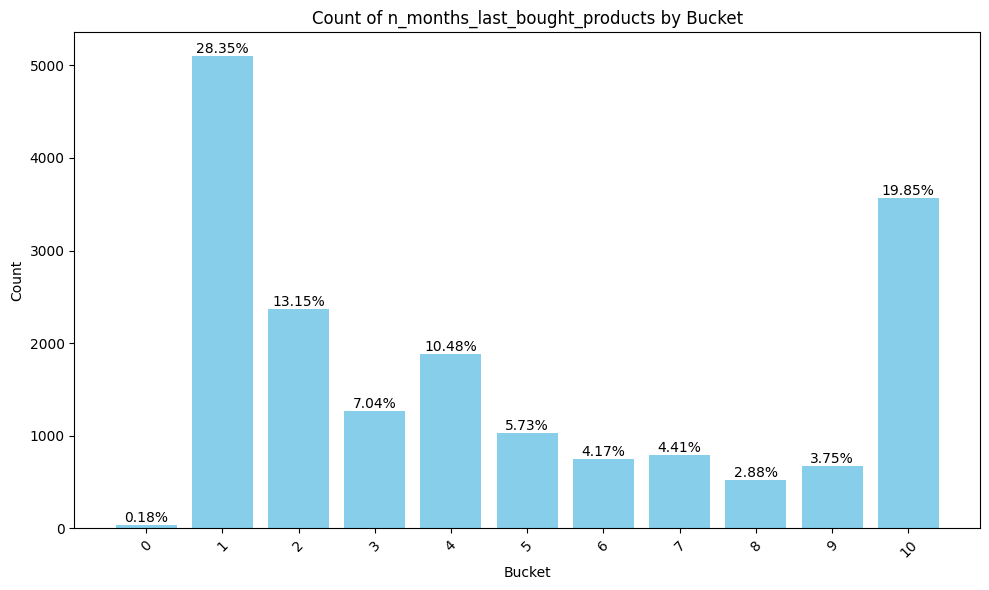

In [ ]:
# Group by bucket and count occurrences
bucket_counts = df["n_months_last_bought_products"].value_counts().sort_index()

# Calculate total count
total_count = bucket_counts.sum()

# Plotting the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(bucket_counts.index.astype(str), bucket_counts.values, color='skyblue')

# Adding percentage distribution on top of each bar
for bar in bars:
    height = bar.get_height()
    percentage = height / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Bucket')
plt.ylabel('Count')
plt.title('Count of n_months_last_bought_products by Bucket')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

#bucketed in this manner because we want to capture 80% of the data in the buckets.

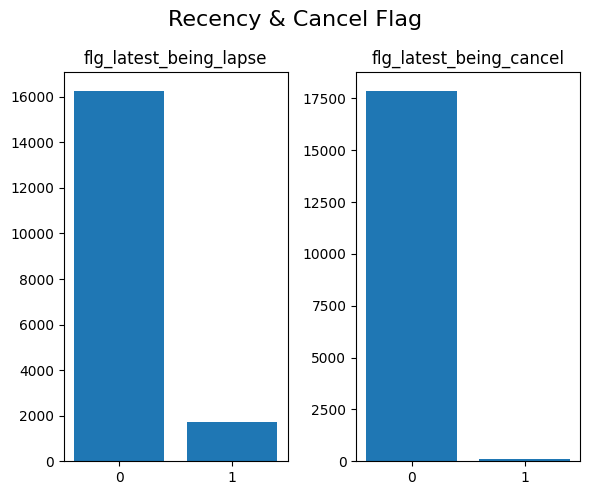

In [ ]:
# Recency and cancel flag columns
columns_to_plot = df.columns[36:38]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 5))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    data = df[column].value_counts()
    axes[i].bar(data.index, data.values)
    axes[i].set_xticks([0, 1])
    axes[i].set_title(column)
fig.suptitle('Recency & Cancel Flag', fontsize=16)
plt.tight_layout()
plt.show()
for i in range(36, 38):
  x[df.columns[i]] = df[df.columns[i]]

In [ ]:
#Recency lapse, recency cancel, tot_cancel_pols, f_ever_declined_la, columns fill na

df["recency_lapse"] = df["recency_lapse"].fillna(0)
df["recency_cancel"] = df["recency_cancel"].fillna(0)
df["tot_cancel_pols"] = df["tot_cancel_pols"].fillna(0)
df["f_ever_declined_la"] = df["f_ever_declined_la"].fillna(0)

x["recency_lapse"] = df["recency_lapse"]
x["recency_cancel"] = df["recency_cancel"]
x["tot_cancel_pols"] = df["tot_cancel_pols"]
x["f_ever_declined_la"] = df["f_ever_declined_la"]

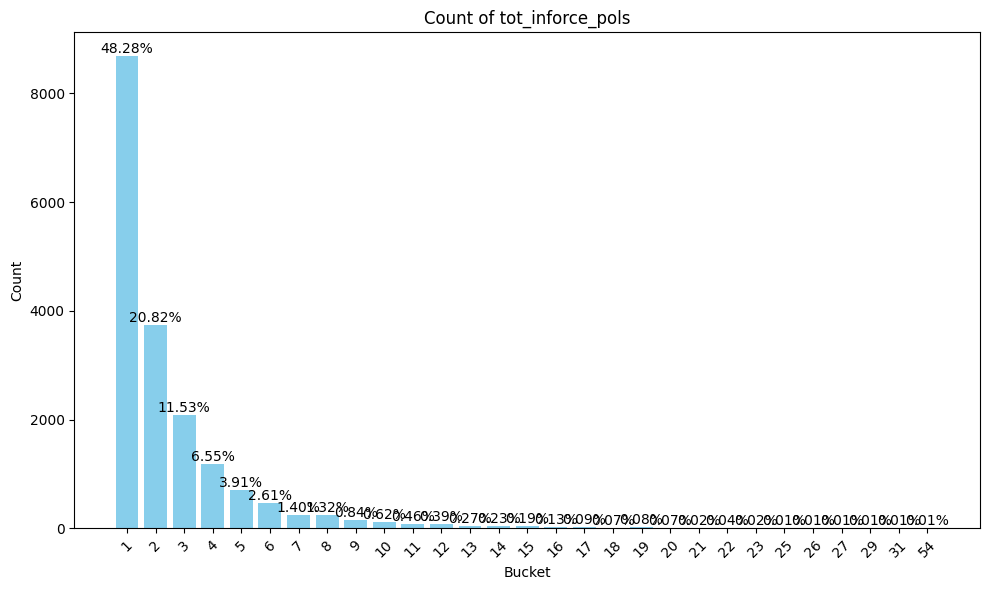

In [ ]:
# Group by bucket and count occurrences
bucket_counts = df["tot_inforce_pols"].value_counts().sort_index()

# Calculate total count
total_count = bucket_counts.sum()

# Plotting the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(bucket_counts.index.astype(str), bucket_counts.values, color='skyblue')

# Adding percentage distribution on top of each bar
for bar in bars:
    height = bar.get_height()
    percentage = height / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Bucket')
plt.ylabel('Count')
plt.title('Count of tot_inforce_pols')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

#shows that 91% of customers have 5 or less in force policies

The flags f_ever_bought_ indicate whether the client has bought that particular product before while the variables n_months_last_bought_ indicate the previous time the client bought that product. As the information from the flags are being captured in the n_months_last_bought_ variables, the columns containing the flags will be dropped.



In [ ]:
lapse_ape_cols = df.filter(like='lapse_ape_').columns
df[lapse_ape_cols] = df[lapse_ape_cols].fillna(0)

n_months_lapse_cols = df.filter(like='n_months_since_lapse_').columns
df[n_months_lapse_cols] = df[n_months_lapse_cols].fillna(9999)

In [ ]:
df[lapse_ape_cols]

,lapse_ape_ltc_1280bf,lapse_ape_grp_6fc3e6,lapse_ape_grp_de05ae,lapse_ape_inv_dcd836,lapse_ape_grp_945b5a,lapse_ape_grp_6a5788,lapse_ape_ltc_43b9d5,lapse_ape_grp_9cdedf,lapse_ape_lh_d0adeb,lapse_ape_grp_1581d7,...,lapse_ape_grp_fd3bfb,lapse_ape_lh_e22a6a,lapse_ape_grp_70e1dd,lapse_ape_grp_e04c3a,lapse_ape_grp_fe5fb8,lapse_ape_grp_94baec,lapse_ape_grp_e91421,lapse_ape_lh_f852af,lapse_ape_lh_947b15,lapse_ape_32c74c
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,601.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,49.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
last_bought_col = df.filter(like='n_months_last_bought_').columns
last_bought_col.delete(0)

Index(['n_months_last_bought_839f8a', 'n_months_last_bought_e22a6a',
       'n_months_last_bought_d0adeb', 'n_months_last_bought_c4bda5',
       'n_months_last_bought_ltc', 'n_months_last_bought_507c37',
       'n_months_last_bought_gi', 'n_months_last_bought_ltc_1280bf',
       'n_months_last_bought_grp_6fc3e6', 'n_months_last_bought_grp_de05ae',
       'n_months_last_bought_inv_dcd836', 'n_months_last_bought_grp_945b5a',
       'n_months_last_bought_grp_6a5788', 'n_months_last_bought_ltc_43b9d5',
       'n_months_last_bought_grp_9cdedf', 'n_months_last_bought_lh_d0adeb',
       'n_months_last_bought_grp_1581d7', 'n_months_last_bought_grp_22decf',
       'n_months_last_bought_lh_507c37', 'n_months_last_bought_lh_839f8a',
       'n_months_last_bought_inv_e9f316', 'n_months_last_bought_grp_caa6ff',
       'n_months_last_bought_grp_fd3bfb', 'n_months_last_bought_lh_e22a6a',
       'n_months_last_bought_grp_70e1dd', 'n_months_last_bought_grp_e04c3a',
       'n_months_last_bought_grp_fe5fb

In [ ]:
df['latest_n_months'] = df[last_bought_col].min(axis=1)
df['longest_lapse_ape'] = df[lapse_ape_cols].max(axis=1)
df['latest_n_months_lapse'] = df[n_months_lapse_cols].min(axis=1)

x["latest_n_months"] = df["latest_n_months"]
x["longest_lapse_ape"] = df["longest_lapse_ape"]
x["latest_n_months_lapse"] = df["latest_n_months_lapse"]


In order to reduce dimensionality of the data, we have decided to find the shortest number of months for the n_months_last_bought_ columns and n_months_since_lapse_ columns as well as the largest lapse value among all the policies per client. The reasoning behind this is that it is more common for customers to not make a purchase if they had made one recently or if the plan has been lapsed for a long time.

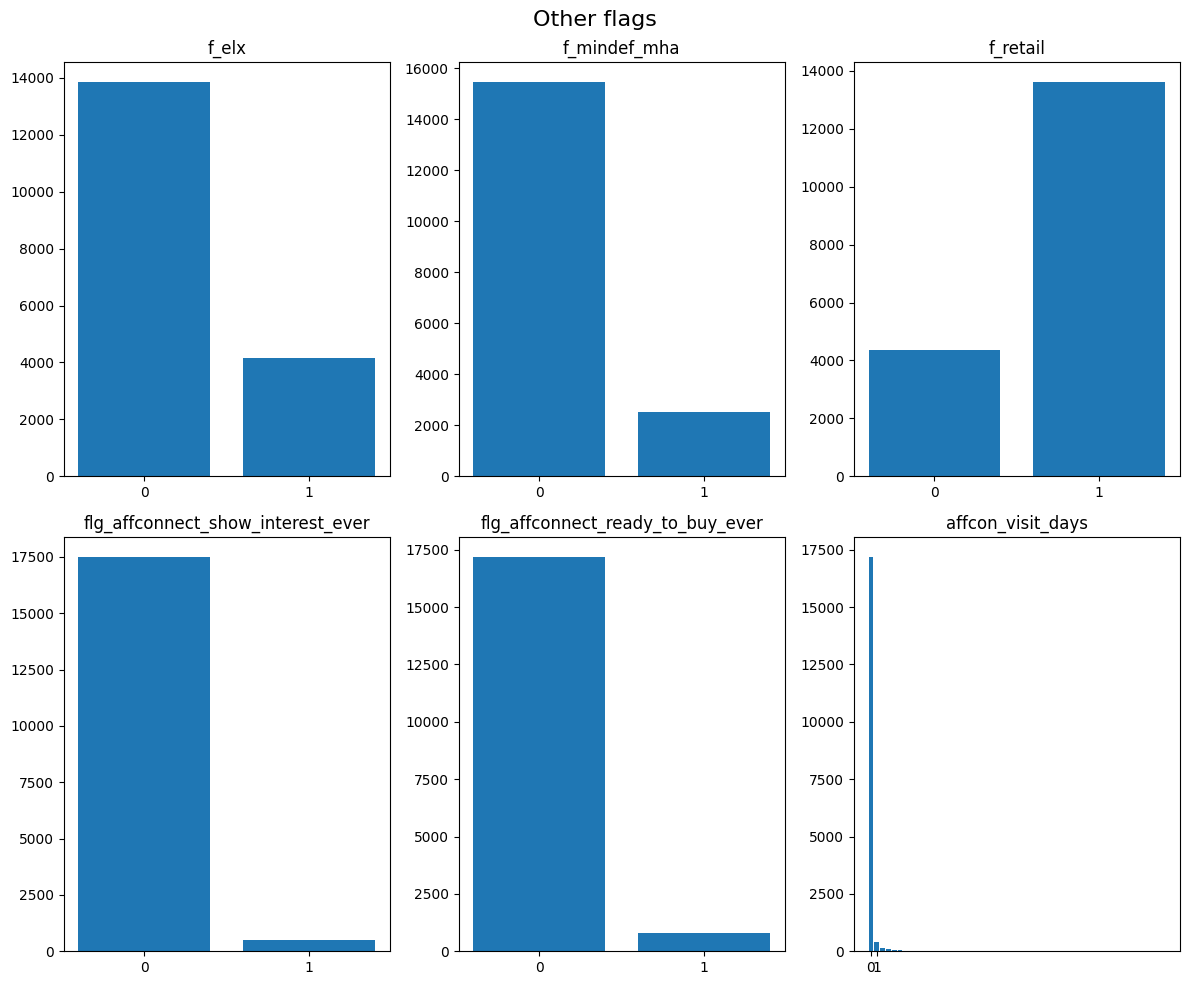

In [ ]:
columns_to_plot = df.columns[273:278].append(pd.Index([df.columns[279]]))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    df[column] = df[column].fillna(0)
    data = df[column].value_counts()
    axes[i].bar(data.index, data.values)
    axes[i].set_xticks([0, 1])
    axes[i].set_title(column)
fig.suptitle('Other flags', fontsize=16)
plt.tight_layout()
plt.show()
for i in range(273, 278):
  x[df.columns[i]] = df[df.columns[i]]
x[df.columns[279]] = df[df.columns[279]]
x["f_purchase_lh"] = df["f_purchase_lh"]

As can be seen from the above diagrams, there are are a significant number of people in each category hence we will need to include this feature in the model to better improve its explainability.

In [ ]:
x = x.astype(int)

In [ ]:
x = x.drop(columns=['latest_n_months_lapse'])

In [ ]:
x = x[x["n_months_last_bought_products"] > 0]

In [ ]:
data = {
    'training data': np.array(x.drop(columns=['f_purchase_lh'])),
    'labels': np.array(x['f_purchase_lh'])
}

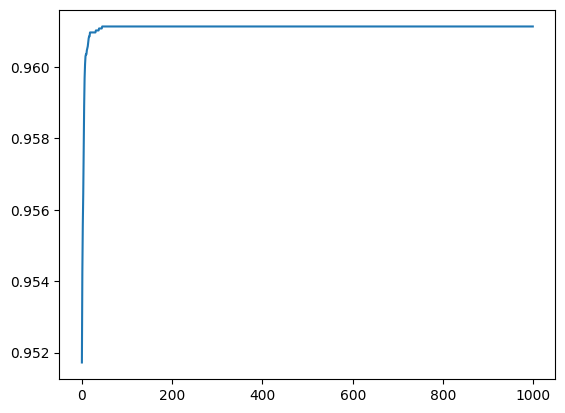

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=[43,]))
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(tf.keras.layers.Dense(units=25, activation='relu'))
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='relu'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-7)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])
hist = model.fit(data['training data'], data['labels'], verbose=False, epochs=50)
plt.plot(hist.history['acc'])
plt.show()

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''
    x = pd.DataFrame()

    hidden_data["ctrycode_desc"] = (hidden_data["ctrycode_desc"] != "Singapore").astype(int)

    mapping1 = {"P": 0, "G": 1, "C": 2}
    hidden_data["clttype"] = hidden_data["clttype"].replace(mapping1)

    mapping2 = {"ACTIVE": 0, "LAPSED": 1, "MATURED": 2}
    hidden_data["stat_flag"] = hidden_data["stat_flag"].replace(mapping2)

    hidden_data['min_occ_date'] = pd.to_datetime(hidden_data['min_occ_date'], errors='coerce')
    median_value = hidden_data['min_occ_date'].median()
    hidden_data['min_occ_date'].fillna(median_value, inplace=True)
    current_date = datetime.now()
    hidden_data['min_occ_date'] = (current_date - hidden_data['min_occ_date']).astype('timedelta64[Y]').astype(int)

    hidden_data['cltdob_fix'] = pd.to_datetime(hidden_data['cltdob_fix'], errors='coerce')
    median_value = hidden_data['cltdob_fix'].median()
    hidden_data['cltdob_fix'].fillna(median_value, inplace=True)
    current_date = datetime.now()
    hidden_data['cltdob_fix'] = (current_date - hidden_data['cltdob_fix']).astype('timedelta64[Y]').astype(int)

    hidden_data["cltsex_fix"] = (hidden_data["cltsex_fix"] != "Male").astype(int)
    for i in range(3, 9):
      x[hidden_data.columns[i]] = hidden_data[hidden_data.columns[i]]

    columns_to_plot = hidden_data.columns[9:19]
    for i, column in enumerate(columns_to_plot):
        hidden_data[column] = hidden_data[column].fillna(0)
    for i in range(9, 19):
      x[hidden_data.columns[i]] = hidden_data[hidden_data.columns[i]]

    columns_to_plot = hidden_data.columns[19:25]
    for i, column in enumerate(columns_to_plot):
        hidden_data[column] = hidden_data[column].fillna(0)
    for i in range(19, 25):
      x[hidden_data.columns[i]] = hidden_data[hidden_data.columns[i]]


    columns_to_plot = hidden_data.columns[25:33]
    for i, column in enumerate(columns_to_plot):
        hidden_data[column] = hidden_data[column].fillna(0)

    #used mode of values change missing values
    mode_result = hidden_data['hh_size_est'].mode()

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    hidden_data["hh_size_est"] = hidden_data["hh_size_est"].fillna(mode_result[0])

    #Process >4 to 5 for Encoder, ensure all to String for Encoder
    hidden_data['hh_size_est'] = hidden_data['hh_size_est'].replace('>4', '5')
    hidden_data['hh_size_est'] = hidden_data['hh_size_est'].astype(str)

    #print(hidden_data['hh_size_est'])

    hidden_data["hh_size_est"] = label_encoder.fit_transform(hidden_data['hh_size_est'])


    #used mode of values change missing values
    mode_result = hidden_data['annual_income_est'].mode()

    hidden_data["annual_income_est"] = hidden_data["annual_income_est"].fillna(mode_result[0])
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Encode the 'Category' column
    hidden_data["annual_income_est"] = label_encoder.fit_transform(hidden_data['annual_income_est'])


    for i in range(25, 30):
      x[hidden_data.columns[i]] = hidden_data[hidden_data.columns[i]]

    for i in range(33, 35):
      x[hidden_data.columns[i]] = hidden_data[hidden_data.columns[i]]


    # Define bins
    bins = [-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]

    # Ensure monotonicity
    assert all(bins[i] < bins[i + 1] for i in range(len(bins) - 1))

    # Cut data into intervals
    hidden_data["n_months_last_bought_products"] = pd.cut(hidden_data["n_months_last_bought_products"], bins=bins, labels=False)

    # Display DataFrame
    #print(hidden_data["n_months_last_bought_products"])
    x["n_months_last_bought_products"] = hidden_data["n_months_last_bought_products"]


    # Recency and cancel flag columns
    columns_to_plot = hidden_data.columns[36:38]
    for i, column in enumerate(columns_to_plot):
        data = hidden_data[column].value_counts()

    for i in range(36, 38):
      x[hidden_data.columns[i]] = hidden_data[hidden_data.columns[i]]

    #Recency lapse, recency cancel, tot_cancel_pols, f_ever_declined_la, columns fill na

    hidden_data["recency_lapse"] = hidden_data["recency_lapse"].fillna(0)
    hidden_data["recency_cancel"] = hidden_data["recency_cancel"].fillna(0)
    hidden_data["tot_cancel_pols"] = hidden_data["tot_cancel_pols"].fillna(0)
    hidden_data["f_ever_declined_la"] = hidden_data["f_ever_declined_la"].fillna(0)

    x["recency_lapse"] = hidden_data["recency_lapse"]
    x["recency_cancel"] = hidden_data["recency_cancel"]
    x["tot_cancel_pols"] = hidden_data["tot_cancel_pols"]
    x["f_ever_declined_la"] = hidden_data["f_ever_declined_la"]


    lapse_ape_cols = hidden_data.filter(like='lapse_ape_').columns
    hidden_data[lapse_ape_cols] = hidden_data[lapse_ape_cols].fillna(0)

    n_months_lapse_cols = hidden_data.filter(like='n_months_since_lapse_').columns
    hidden_data[n_months_lapse_cols] = hidden_data[n_months_lapse_cols].fillna(9999)


    last_bought_col = hidden_data.filter(like='n_months_last_bought_').columns
    last_bought_col.delete(0)


    hidden_data['latest_n_months'] = hidden_data[last_bought_col].min(axis=1)
    hidden_data['longest_lapse_ape'] = hidden_data[lapse_ape_cols].max(axis=1)
    hidden_data['latest_n_months_lapse'] = hidden_data[n_months_lapse_cols].min(axis=1)

    x["latest_n_months"] = hidden_data["latest_n_months"]
    x["longest_lapse_ape"] = hidden_data["longest_lapse_ape"]
    x["latest_n_months_lapse"] = hidden_data["latest_n_months_lapse"]

    columns_to_plot = hidden_data.columns[273:278].append(pd.Index([hidden_data.columns[279]]))
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
    axes = axes.flatten()
    for i, column in enumerate(columns_to_plot):
        hidden_data[column] = hidden_data[column].fillna(0)
        data = hidden_data[column].value_counts()
        axes[i].bar(data.index, data.values)
        axes[i].set_xticks([0, 1])
        axes[i].set_title(column)
    fig.suptitle('Other flags', fontsize=16)
    plt.tight_layout()
    plt.show()
    for i in range(273, 278):
      x[hidden_data.columns[i]] = hidden_data[hidden_data.columns[i]]
    x[hidden_data.columns[279]] = hidden_data[hidden_data.columns[279]]


    x = x.astype(int)
    x = x.drop(columns=['latest_n_months_lapse'])
    x = x[x["n_months_last_bought_products"] > 0]


    output = model.predict(x)
    result = output.tolist()
    return result

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

NameError: name 'pd' is not defined